# Spectroscopy of a three 2D cavity system 

1. **Introduction**
2. **Problem parameters**
3. **Setting up the operators and the Hamiltonian's**
    * **Defining functions**
    * **Defining the operators for the cavties and qubits**
    * **Defining the Hamiltonians for the qubit-cavity system**
4. **Frequency spectrum of the coupled system**
5. **Evolving qubit 1 in the system with time (no thermal losses)**


<u>Author</u> : Soumya Shreeram (shreeramsoumya@gmail.com)<br>
<u>Supervisor</u> : Yu-Chin Chao (ychao@fnal.gov) <br>
<u>Date</u>$\ \ \ \$: July 2019<br>

This script was coded as part of the Helen Edwards Summer Internship program at Fermilab.

The hamiltonian for such a system with two qubits with frequencies $v_{Q,1}$, $v_{Q,2}$, and $n$ mode filter can be described as,

$$ \hat{H}_{F} = \sum_{i=1}^{n}h\ v_{F}\ \hat{a}^{\dagger}_i \hat{a}_i +  \sum_{i=2}^{n}h\ g_{F}\ (\hat{a}^{\dagger}_i \hat{a}_{i-1} + \hat{a}^{\dagger}_{i-1} \hat{a}_i)$$

where $\hat{a}_i$ creates a photon in the $i^{th}$ resonantor, and $g_F$ is the filter-filter coupling.

The code calculates the eigen modes for such a system for a range of frequencies.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from math import pi
from qutip import *

## 2. Problem parameters

In [6]:
w_f1 = 2*pi*7.1     # Resonator/ Filter frequency
w_f2 = 2*pi*7.24
w_f3 = 2*pi*7.37
g_f1 = 2*pi*1.818     # Filter-filter coupling
g_f2 = 2*pi*3.0

numF = 3             # number of filters
N = 2                # number of fock states (??)

tlist = np.linspace(0, 25, 101)

In [7]:
def antiCommut(a2, a1):
  """
  Computes product of a2.dag()*a1, then sums this to (a2.dag()*a1).dag()
  @param a1 :: destruction operator 1
  @param a2 :: destruction operator 2
  """
  return a2.dag()*a1 + a1.dag()*a2

In [8]:
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N))
a2 = tensor(qeye(N), destroy(N), qeye(N))
a3 = tensor(qeye(N), destroy(N), qeye(N))

# Filter Hamiltonians (refer formula in the Introduction)
# Filter Hamiltonians (refer formula in the Introduction)
H_a1 = tensor(destroy(N)*create(N),qeye(N),qeye(N))
H_a2 = tensor(qeye(N),destroy(N)*create(N),qeye(N))
H_a3 = tensor(qeye(N),qeye(N),destroy(N)*create(N))

H_f1 = tensor(destroy(N),create(N),qeye(N)) + tensor(create(N),destroy(N),qeye(N))
H_f2 = tensor(qeye(N),create(N),destroy(N)) + tensor(qeye(N),destroy(N),create(N))

Hf = w_f1*H_a1 + w_f2*H_a2 + w_f3*H_a3+ g_f1*H_f1+g_f2*H_f2   

In [13]:
def compute(w_qList, Hf, N):
  """
  Computes the Eigen-vales and states for a given qubit frequency
  @param w_qList :: range of qubit frequencies
  @param H_q1 :: Qubit 1 independent Hamiltonian 
  @param N :: Number of Fock states
  @param sz1 :: z matrix for qubit 1
  """
  evals_mat = np.zeros((len(w_qList), 8))
  for i, w_qi in enumerate(w_qList):
    H = Hf 
    evals, evecs = H.eigenstates()
    evals_mat[i,:] = evals
  return evals_mat

In [21]:
print(H.eigenenergies())
Hf 

[  0.          23.61644915  45.06677361  67.72473026  68.68322275
  91.34117941 112.79150387 136.40795302]


Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[136.40795302   0.           0.           0.           0.
    0.           0.           0.        ]
 [  0.          90.1008773   18.84955592   0.           0.
    0.           0.           0.        ]
 [  0.          18.84955592  90.91769139   0.          11.42283089
    0.           0.           0.        ]
 [  0.           0.           0.          44.61061568   0.
   11.42283089   0.           0.        ]
 [  0.           0.          11.42283089   0.          91.79733734
    0.           0.           0.        ]
 [  0.           0.           0.          11.42283089   0.
   45.49026162  18.84955592   0.        ]
 [  0.           0.           0.           0.           0.
   18.84955592  46.30707571   0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.        ]]

In [15]:
# range of qubit 1 frequencies
w_q1List = np.linspace(0.1,7.2,100)*2*pi

evals_mat = compute(w_q1List, Hf, N)

y1 = evals_mat[:, 1] - evals_mat[:, 0]

Text(0.5, 1.0, 'Energy Spectrum for 3 cavities')

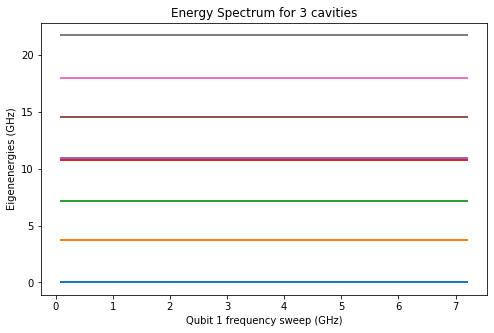

In [19]:
fig,ax = plt.subplots(figsize=(8,5))

for n in range(0,8):
  ax.plot(w_q1List / (2 * pi), (evals_mat[:, n] - evals_mat[:, 0])/ (2 * pi), lw=2)
ax.set_xlabel('Qubit 1 frequency sweep (GHz)')
#ax.set_ylim([6.99,7.001])
ax.set_ylabel('Eigenenergies (GHz)')
ax.set_title('Energy Spectrum for 3 cavities')